import the libraries used for this machine learning problem.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import sns as sns
import yfinance as yf

download the realtime data required and save to a csv file.

In [2]:
# downloading crypto data
crypto_symbols = ['BTC', 'ETH', 'USDT','USDC', 'BNB',
                  'BUSD', 'XRP', 'ADA', 'SOL', 'DOGE',
                  'DAI', 'DOT', 'WTRX', 'HEX', 'TRX',
                  'SHIB', 'LEO', 'WBTC', 'AVAX', 'YOUC',
                  'MATIC', 'STETH', 'UNI1', 'LTC', 'FTT',
                  'LINK', 'CRO', 'XLM', 'NEAR', 'ATOM']
ticker = []

for coins in crypto_symbols:
    ticker.append(f'{coins}-USD')
ticker

Crypto_data = yf.download(ticker,start='2020-01-01', end='2022-08-05', interval='1d' )
print(Crypto_data)

Crypto_data.to_csv('latestcrypto.csv')

[*********************100%***********************]  30 of 30 completed
           Adj Close                                                  \
             ADA-USD   ATOM-USD   AVAX-USD     BNB-USD       BTC-USD   
Date                                                                   
2020-01-01  0.033458   4.380158        NaN   13.689083   7200.174316   
2020-01-02  0.032751   4.091817        NaN   13.027011   6985.470215   
2020-01-03  0.034180   4.247897        NaN   13.660452   7344.884277   
2020-01-04  0.034595   4.286356        NaN   13.891512   7410.656738   
2020-01-05  0.034721   4.231877        NaN   14.111019   7411.317383   
...              ...        ...        ...         ...           ...   
2022-07-31  0.517020  10.375255  23.745783  283.579468  23336.896484   
2022-08-01  0.514123  10.426343  23.658236  283.539490  23314.199219   
2022-08-02  0.496833   9.944060  22.861057  283.820984  22978.117188   
2022-08-03  0.500988  10.170477  23.071917  298.356781  22846.507

Data understanding using the CSV file
printing the head of the dataset.

In [3]:
data = pd.read_csv('latestcrypto.csv')
print(data.shape)
data.head()

(949, 181)


,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Adj Close.3,Adj Close.4,Adj Close.5,Adj Close.6,Adj Close.7,Adj Close.8,...,Volume.20,Volume.21,Volume.22,Volume.23,Volume.24,Volume.25,Volume.26,Volume.27,Volume.28,Volume.29
0,NaN,ADA-USD,ATOM-USD,AVAX-USD,BNB-USD,BTC-USD,BUSD-USD,CRO-USD,DAI-USD,DOGE-USD,...,STETH-USD,TRX-USD,UNI1-USD,USDC-USD,USDT-USD,WBTC-USD,WTRX-USD,XLM-USD,XRP-USD,YOUC-USD
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,0.03345799818634987,4.380157947540283,NaN,13.689083099365234,7200.17431640625,1.0033609867095947,0.033973000943660736,1.0002429485321045,0.00203300011344254,...,NaN,977215885,NaN,242586528,21503143454,90438,NaN,168402204,1041134003,NaN
3,2020-01-02,0.03275100141763687,4.0918169021606445,NaN,13.027010917663574,6985.47021484375,1.002925992012024,0.032857999205589294,0.9978229999542236,0.0020089999306946993,...,NaN,999867628,NaN,318268134,24212314977,106071,NaN,151848963,1085351426,NaN
4,2020-01-03,0.03418000042438507,4.247897148132324,NaN,13.660451889038086,7344.88427734375,1.0047169923782349,0.03466600179672241,1.0021849870681763,0.002145000034943223,...,NaN,1109470187,NaN,374792167,32420287856,38445,NaN,168931018,1270017043,NaN


We can see we have 949 rows and 181 columns.

Let's choose the column that is important for this prediction and that is only the Close feature.

In [4]:
CryptoClose = Crypto_data.loc[:, "Close"].copy()
print(CryptoClose.shape)
CryptoClose

(947, 30)


,ADA-USD,ATOM-USD,AVAX-USD,BNB-USD,BTC-USD,BUSD-USD,CRO-USD,DAI-USD,DOGE-USD,DOT-USD,...,STETH-USD,TRX-USD,UNI1-USD,USDC-USD,USDT-USD,WBTC-USD,WTRX-USD,XLM-USD,XRP-USD,YOUC-USD
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.033458,4.380158,NaN,13.689083,7200.174316,1.003361,0.033973,1.000243,0.002033,NaN,...,NaN,0.013250,NaN,1.004079,0.999836,7224.741211,NaN,0.045451,0.192667,NaN
2020-01-02,0.032751,4.091817,NaN,13.027011,6985.470215,1.002926,0.032858,0.997823,0.002009,NaN,...,NaN,0.012870,NaN,1.005017,1.001565,7006.900391,NaN,0.044112,0.188043,NaN
2020-01-03,0.034180,4.247897,NaN,13.660452,7344.884277,1.004717,0.034666,1.002185,0.002145,NaN,...,NaN,0.013435,NaN,1.005273,1.004192,7341.853027,NaN,0.045234,0.193521,NaN
2020-01-04,0.034595,4.286356,NaN,13.891512,7410.656738,1.008474,0.034689,1.007795,0.002241,NaN,...,NaN,0.013521,NaN,1.009466,1.007472,7408.195312,NaN,0.046272,0.194355,NaN
2020-01-05,0.034721,4.231877,NaN,14.111019,7411.317383,1.008208,0.034618,1.007635,0.002419,NaN,...,NaN,0.013623,NaN,1.008497,1.006197,7401.396484,NaN,0.045359,0.195537,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,0.517020,10.375255,23.745783,283.579468,23336.896484,0.999321,0.137200,0.999101,0.068272,8.645671,...,1640.539673,0.068943,8.371331,0.999797,1.000328,23346.865234,0.068922,0.117787,0.380458,0.511388
2022-08-01,0.514123,10.426343,23.658236,283.539490,23314.199219,1.001188,0.138689,1.000067,0.068725,8.194032,...,1595.321411,0.069937,8.383391,0.999837,1.000204,23267.330078,0.070026,0.118580,0.379976,0.511324
2022-08-02,0.496833,9.944060,22.861057,283.820984,22978.117188,0.999920,0.152147,0.999674,0.066694,7.938991,...,1594.174438,0.068373,8.289977,0.999934,1.000159,22970.859375,0.068538,0.115173,0.372021,0.511301


In [5]:
CryptoClose.describe()

,ADA-USD,ATOM-USD,AVAX-USD,BNB-USD,BTC-USD,BUSD-USD,CRO-USD,DAI-USD,DOGE-USD,DOT-USD,...,STETH-USD,TRX-USD,UNI1-USD,USDC-USD,USDT-USD,WBTC-USD,WTRX-USD,XLM-USD,XRP-USD,YOUC-USD
count,947.000000,947.000000,684.000000,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000,715.000000,...,590.000000,947.000000,687.000000,947.000000,947.000000,947.000000,153.000000,947.000000,947.000000,668.000000
mean,0.797177,14.489471,40.854102,234.303718,30429.670925,1.000362,0.189325,1.003234,0.105734,20.312518,...,2580.598449,0.054314,15.913009,1.000862,1.000693,30418.333109,0.068589,0.211579,0.569133,0.157262
std,0.742696,11.286546,33.370662,202.884586,17921.946461,0.002816,0.153850,0.008065,0.119856,12.668957,...,982.072012,0.033076,10.325705,0.004510,0.002840,17890.522126,0.007279,0.144367,0.362956,0.158587
min,0.023961,1.649203,2.906161,9.386050,4970.788086,0.970006,0.030070,0.964845,0.001537,2.875028,...,588.655334,0.008792,1.930119,0.970124,0.974248,4946.042969,0.055917,0.033441,0.139635,0.000810
25%,0.102962,4.806642,12.971253,23.230465,10820.795898,0.999800,0.079204,0.999925,0.002778,8.011854,...,1774.806396,0.024839,5.847847,0.999859,1.000036,10833.537109,0.063238,0.080359,0.247214,0.048109
50%,0.552777,10.339783,29.042500,255.953735,32505.660156,1.000100,0.144583,1.000904,0.063107,18.638643,...,2589.849731,0.058920,15.236010,1.000101,1.000380,32448.804688,0.067249,0.184571,0.459924,0.098968
75%,1.291657,23.571448,68.876308,402.179474,45547.333984,1.000721,0.195648,1.003916,0.180620,29.839377,...,3258.940186,0.075386,24.651256,1.000496,1.000996,45554.333984,0.072424,0.317413,0.818570,0.191618
max,2.968239,44.542789,134.531036,675.684082,67566.828125,1.052356,0.900518,1.092951,0.684777,53.881733,...,4777.916992,0.164650,43.164505,1.044029,1.053585,67549.226562,0.087228,0.729996,1.839236,0.511388


Now we have 947 rows and 30 columns

As we can see the data is not clean, we have some NaN values, lets us take this away.
We will be using the drop na function and the pct function to drop and get the returns of these crypto prices.

That is how we can better understand the data distributions and correlation.

In [6]:
CryptoClose.isna()

,ADA-USD,ATOM-USD,AVAX-USD,BNB-USD,BTC-USD,BUSD-USD,CRO-USD,DAI-USD,DOGE-USD,DOT-USD,...,STETH-USD,TRX-USD,UNI1-USD,USDC-USD,USDT-USD,WBTC-USD,WTRX-USD,XLM-USD,XRP-USD,YOUC-USD
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,False,False,True,False,False,False,False,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2020-01-02,False,False,True,False,False,False,False,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2020-01-03,False,False,True,False,False,False,False,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2020-01-04,False,False,True,False,False,False,False,False,False,True,...,True,False,True,False,False,False,True,False,False,True
2020-01-05,False,False,True,False,False,False,False,False,False,True,...,True,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-08-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-08-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


dropping NaN values with the dropna function

In [7]:
New_data = CryptoClose.dropna(how='all').reset_index().dropna()
New_data

,Date,ADA-USD,ATOM-USD,AVAX-USD,BNB-USD,BTC-USD,BUSD-USD,CRO-USD,DAI-USD,DOGE-USD,...,STETH-USD,TRX-USD,UNI1-USD,USDC-USD,USDT-USD,WBTC-USD,WTRX-USD,XLM-USD,XRP-USD,YOUC-USD
794,2022-03-05,0.865672,30.988174,76.727425,384.873352,39400.585938,0.999776,0.409419,1.000046,0.124996,...,2637.910889,0.060428,9.014436,0.999371,1.000275,39386.609375,0.060396,0.180100,0.754900,0.138246
795,2022-03-06,0.823752,28.128136,72.529022,375.011200,38419.984375,1.000681,0.391524,0.999439,0.120766,...,2549.643555,0.058920,8.488813,0.999851,1.000244,38386.765625,0.058955,0.173367,0.725994,0.098213
796,2022-03-07,0.797379,28.409777,71.880539,381.344635,38062.039062,0.999291,0.379135,0.999825,0.117105,...,2491.440674,0.058680,8.332438,0.999134,1.000123,38061.214844,0.058566,0.170453,0.723287,0.130105
797,2022-03-08,0.801250,27.845692,72.918358,381.958557,38737.269531,1.000158,0.387040,1.000307,0.117029,...,2572.363281,0.060544,8.828000,1.000260,1.000282,38720.222656,0.060757,0.172986,0.720977,0.118968
798,2022-03-09,0.849293,30.100052,77.716049,393.555756,41982.925781,1.000157,0.408820,1.000205,0.121588,...,2725.346436,0.060841,9.201221,1.000450,1.000294,41976.691406,0.060668,0.189024,0.767236,0.103824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,2022-07-31,0.517020,10.375255,23.745783,283.579468,23336.896484,0.999321,0.137200,0.999101,0.068272,...,1640.539673,0.068943,8.371331,0.999797,1.000328,23346.865234,0.068922,0.117787,0.380458,0.511388
943,2022-08-01,0.514123,10.426343,23.658236,283.539490,23314.199219,1.001188,0.138689,1.000067,0.068725,...,1595.321411,0.069937,8.383391,0.999837,1.000204,23267.330078,0.070026,0.118580,0.379976,0.511324
944,2022-08-02,0.496833,9.944060,22.861057,283.820984,22978.117188,0.999920,0.152147,0.999674,0.066694,...,1594.174438,0.068373,8.289977,0.999934,1.000159,22970.859375,0.068538,0.115173,0.372021,0.511301
945,2022-08-03,0.500988,10.170477,23.071917,298.356781,22846.507812,0.999949,0.144386,0.999664,0.066195,...,1577.040039,0.067825,8.983239,1.000032,1.000204,22853.888672,0.067900,0.114186,0.369852,0.511324


In [8]:
daily_returns = CryptoClose.pct_change().dropna()
daily_returns

,ADA-USD,ATOM-USD,AVAX-USD,BNB-USD,BTC-USD,BUSD-USD,CRO-USD,DAI-USD,DOGE-USD,DOT-USD,...,STETH-USD,TRX-USD,UNI1-USD,USDC-USD,USDT-USD,WBTC-USD,WTRX-USD,XLM-USD,XRP-USD,YOUC-USD
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-06,-0.048425,-0.092295,-0.054718,-0.025624,-0.024888,9.052397e-04,-0.043708,-0.000607,-0.033841,-0.019286,...,-0.033461,-0.024955,-0.058309,0.000480,-0.000031,-0.025385,-0.023859,-0.037385,-0.038291,-0.289578
2022-03-07,-0.032016,0.010013,-0.008941,0.016889,-0.009317,-1.389094e-03,-0.031643,0.000386,-0.030315,-0.032236,...,-0.022828,-0.004073,-0.018421,-0.000717,-0.000121,-0.008481,-0.006598,-0.016808,-0.003729,0.324723
2022-03-08,0.004855,-0.019855,0.014438,0.001610,0.017740,8.675647e-04,0.020850,0.000482,-0.000649,0.031778,...,0.032480,0.031765,0.059474,0.001127,0.000159,0.017314,0.037411,0.014860,-0.003194,-0.085600
2022-03-09,0.059960,0.080959,0.065795,0.030362,0.083786,-9.535237e-07,0.056273,-0.000102,0.038956,0.053854,...,0.059472,0.004906,0.042277,0.000190,0.000012,0.084103,-0.001465,0.092713,0.064162,-0.127295
2022-03-10,-0.050603,-0.068261,-0.047763,-0.054368,-0.060631,-9.878515e-04,-0.047525,-0.000064,-0.038680,-0.049677,...,-0.045051,-0.015976,-0.056544,-0.000649,0.000271,-0.062801,-0.013599,-0.052829,-0.038803,0.003439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.016279,-0.029201,-0.019923,-0.013761,-0.013498,-5.530816e-04,-0.003508,-0.000268,-0.019700,0.053250,...,-0.007566,-0.002892,-0.044358,-0.000069,0.000039,-0.012811,-0.005038,-0.013228,-0.018841,0.000039
2022-08-01,-0.005603,0.004924,-0.003687,-0.000141,-0.000973,1.868325e-03,0.010853,0.000967,0.006635,-0.052239,...,-0.027563,0.014418,0.001441,0.000040,-0.000124,-0.003407,0.016018,0.006732,-0.001267,-0.000125
2022-08-02,-0.033630,-0.046256,-0.033696,0.000993,-0.014415,-1.266525e-03,0.097037,-0.000393,-0.029553,-0.031125,...,-0.000719,-0.022363,-0.011143,0.000097,-0.000045,-0.012742,-0.021249,-0.028732,-0.020936,-0.000045


In [9]:
daily_returns.isna()

,ADA-USD,ATOM-USD,AVAX-USD,BNB-USD,BTC-USD,BUSD-USD,CRO-USD,DAI-USD,DOGE-USD,DOT-USD,...,STETH-USD,TRX-USD,UNI1-USD,USDC-USD,USDT-USD,WBTC-USD,WTRX-USD,XLM-USD,XRP-USD,YOUC-USD
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-06,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-03-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-03-08,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-03-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-03-10,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-08-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2022-08-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Let's see the statistical analysis of the data

In [10]:
New_data.describe()

,ADA-USD,ATOM-USD,AVAX-USD,BNB-USD,BTC-USD,BUSD-USD,CRO-USD,DAI-USD,DOGE-USD,DOT-USD,...,STETH-USD,TRX-USD,UNI1-USD,USDC-USD,USDT-USD,WBTC-USD,WTRX-USD,XLM-USD,XRP-USD,YOUC-USD
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.690252,16.150391,46.158101,324.468125,31686.478962,1.000222,0.256198,0.999920,0.098527,12.653690,...,2119.630425,0.068628,7.258924,1.000022,0.999701,31679.719822,0.068589,0.153390,0.529861,0.345106
std,0.235224,8.563706,28.164336,75.022029,8963.350254,0.000946,0.134136,0.000548,0.032102,5.371131,...,792.024093,0.007273,2.176340,0.000289,0.000686,8964.403884,0.007279,0.040574,0.197055,0.209508
min,0.417928,6.082700,14.841097,197.042999,19017.642578,0.998013,0.106582,0.998339,0.053012,6.298569,...,931.387695,0.055786,3.635675,0.999134,0.995872,19029.435547,0.055917,0.100547,0.308090,0.001245
25%,0.489653,9.054348,21.366358,258.338806,22572.839844,0.999434,0.129069,0.999591,0.068503,7.744108,...,1470.475708,0.063221,5.237450,0.999865,0.999107,22553.746094,0.063238,0.114463,0.359118,0.099247
50%,0.570073,11.017660,29.866652,307.815430,30214.355469,1.000207,0.189205,0.999881,0.084581,10.041606,...,1932.657837,0.067238,7.090096,1.000047,1.000020,30229.695312,0.067249,0.140598,0.414673,0.500073
75%,0.877092,24.646391,74.172615,396.447815,39740.320312,1.000900,0.404834,1.000207,0.131013,17.930796,...,2913.217773,0.072501,9.014436,1.000179,1.000262,39757.714844,0.072424,0.189673,0.752178,0.510313
max,1.212945,31.960297,98.077782,450.348877,47465.730469,1.003663,0.485139,1.001532,0.172907,23.208246,...,3519.408691,0.087527,11.863115,1.000766,1.000600,47491.414062,0.087228,0.237047,0.863304,0.511388


In [11]:
daily_returns.describe()

,ADA-USD,ATOM-USD,AVAX-USD,BNB-USD,BTC-USD,BUSD-USD,CRO-USD,DAI-USD,DOGE-USD,DOT-USD,...,STETH-USD,TRX-USD,UNI1-USD,USDC-USD,USDT-USD,WBTC-USD,WTRX-USD,XLM-USD,XRP-USD,YOUC-USD
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,...,152.000000,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000
mean,-0.002058,-0.005341,-0.005505,-0.000581,-0.002990,0.000003,-0.005716,0.000001,-0.002544,-0.003338,...,-0.002227,0.001932,0.001920,0.000004,-8.617334e-07,-0.002984,0.001932,-0.002072,-0.003772,0.196412
std,0.055607,0.060395,0.066400,0.040224,0.035867,0.001162,0.048427,0.000702,0.054541,0.057102,...,0.049172,0.046275,0.064523,0.000328,3.807890e-04,0.035851,0.046169,0.043088,0.041638,2.170140
min,-0.184690,-0.211475,-0.305147,-0.157710,-0.159747,-0.003495,-0.181533,-0.001573,-0.220286,-0.211498,...,-0.172170,-0.165251,-0.197337,-0.000967,-3.919825e-03,-0.160204,-0.170474,-0.154186,-0.195181,-0.976931
25%,-0.032086,-0.040183,-0.045233,-0.021661,-0.021876,-0.000847,-0.029266,-0.000368,-0.028227,-0.036802,...,-0.027313,-0.018623,-0.035695,-0.000176,-6.950371e-05,-0.021432,-0.019403,-0.027894,-0.024882,-0.000298
50%,-0.001142,-0.004264,-0.003466,0.000718,-0.002461,0.000026,-0.000527,-0.000012,0.000783,0.003708,...,-0.001644,0.002872,0.001418,0.000018,1.201367e-05,-0.001930,0.002052,0.000921,-0.000795,0.000000
75%,0.025931,0.024465,0.033106,0.022998,0.016505,0.000760,0.022285,0.000458,0.025339,0.029621,...,0.022733,0.018357,0.036534,0.000188,9.074769e-05,0.016072,0.018671,0.022534,0.018673,0.000342
max,0.184873,0.150997,0.169120,0.090729,0.083786,0.003263,0.097636,0.002139,0.197140,0.199877,...,0.178338,0.192338,0.214341,0.001127,1.744199e-03,0.084103,0.192379,0.096360,0.099196,26.601248


All round information about the data

In [12]:
New_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 794 to 946
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       153 non-null    datetime64[ns]
 1   ADA-USD    153 non-null    float64       
 2   ATOM-USD   153 non-null    float64       
 3   AVAX-USD   153 non-null    float64       
 4   BNB-USD    153 non-null    float64       
 5   BTC-USD    153 non-null    float64       
 6   BUSD-USD   153 non-null    float64       
 7   CRO-USD    153 non-null    float64       
 8   DAI-USD    153 non-null    float64       
 9   DOGE-USD   153 non-null    float64       
 10  DOT-USD    153 non-null    float64       
 11  ETH-USD    153 non-null    float64       
 12  FTT-USD    153 non-null    float64       
 13  HEX-USD    153 non-null    float64       
 14  LEO-USD    153 non-null    float64       
 15  LINK-USD   153 non-null    float64       
 16  LTC-USD    153 non-null    float64       


Further exploration can be done on the data by checking to see the distribution, we will use the univariate analysis.
Let's plot a histogram to check.

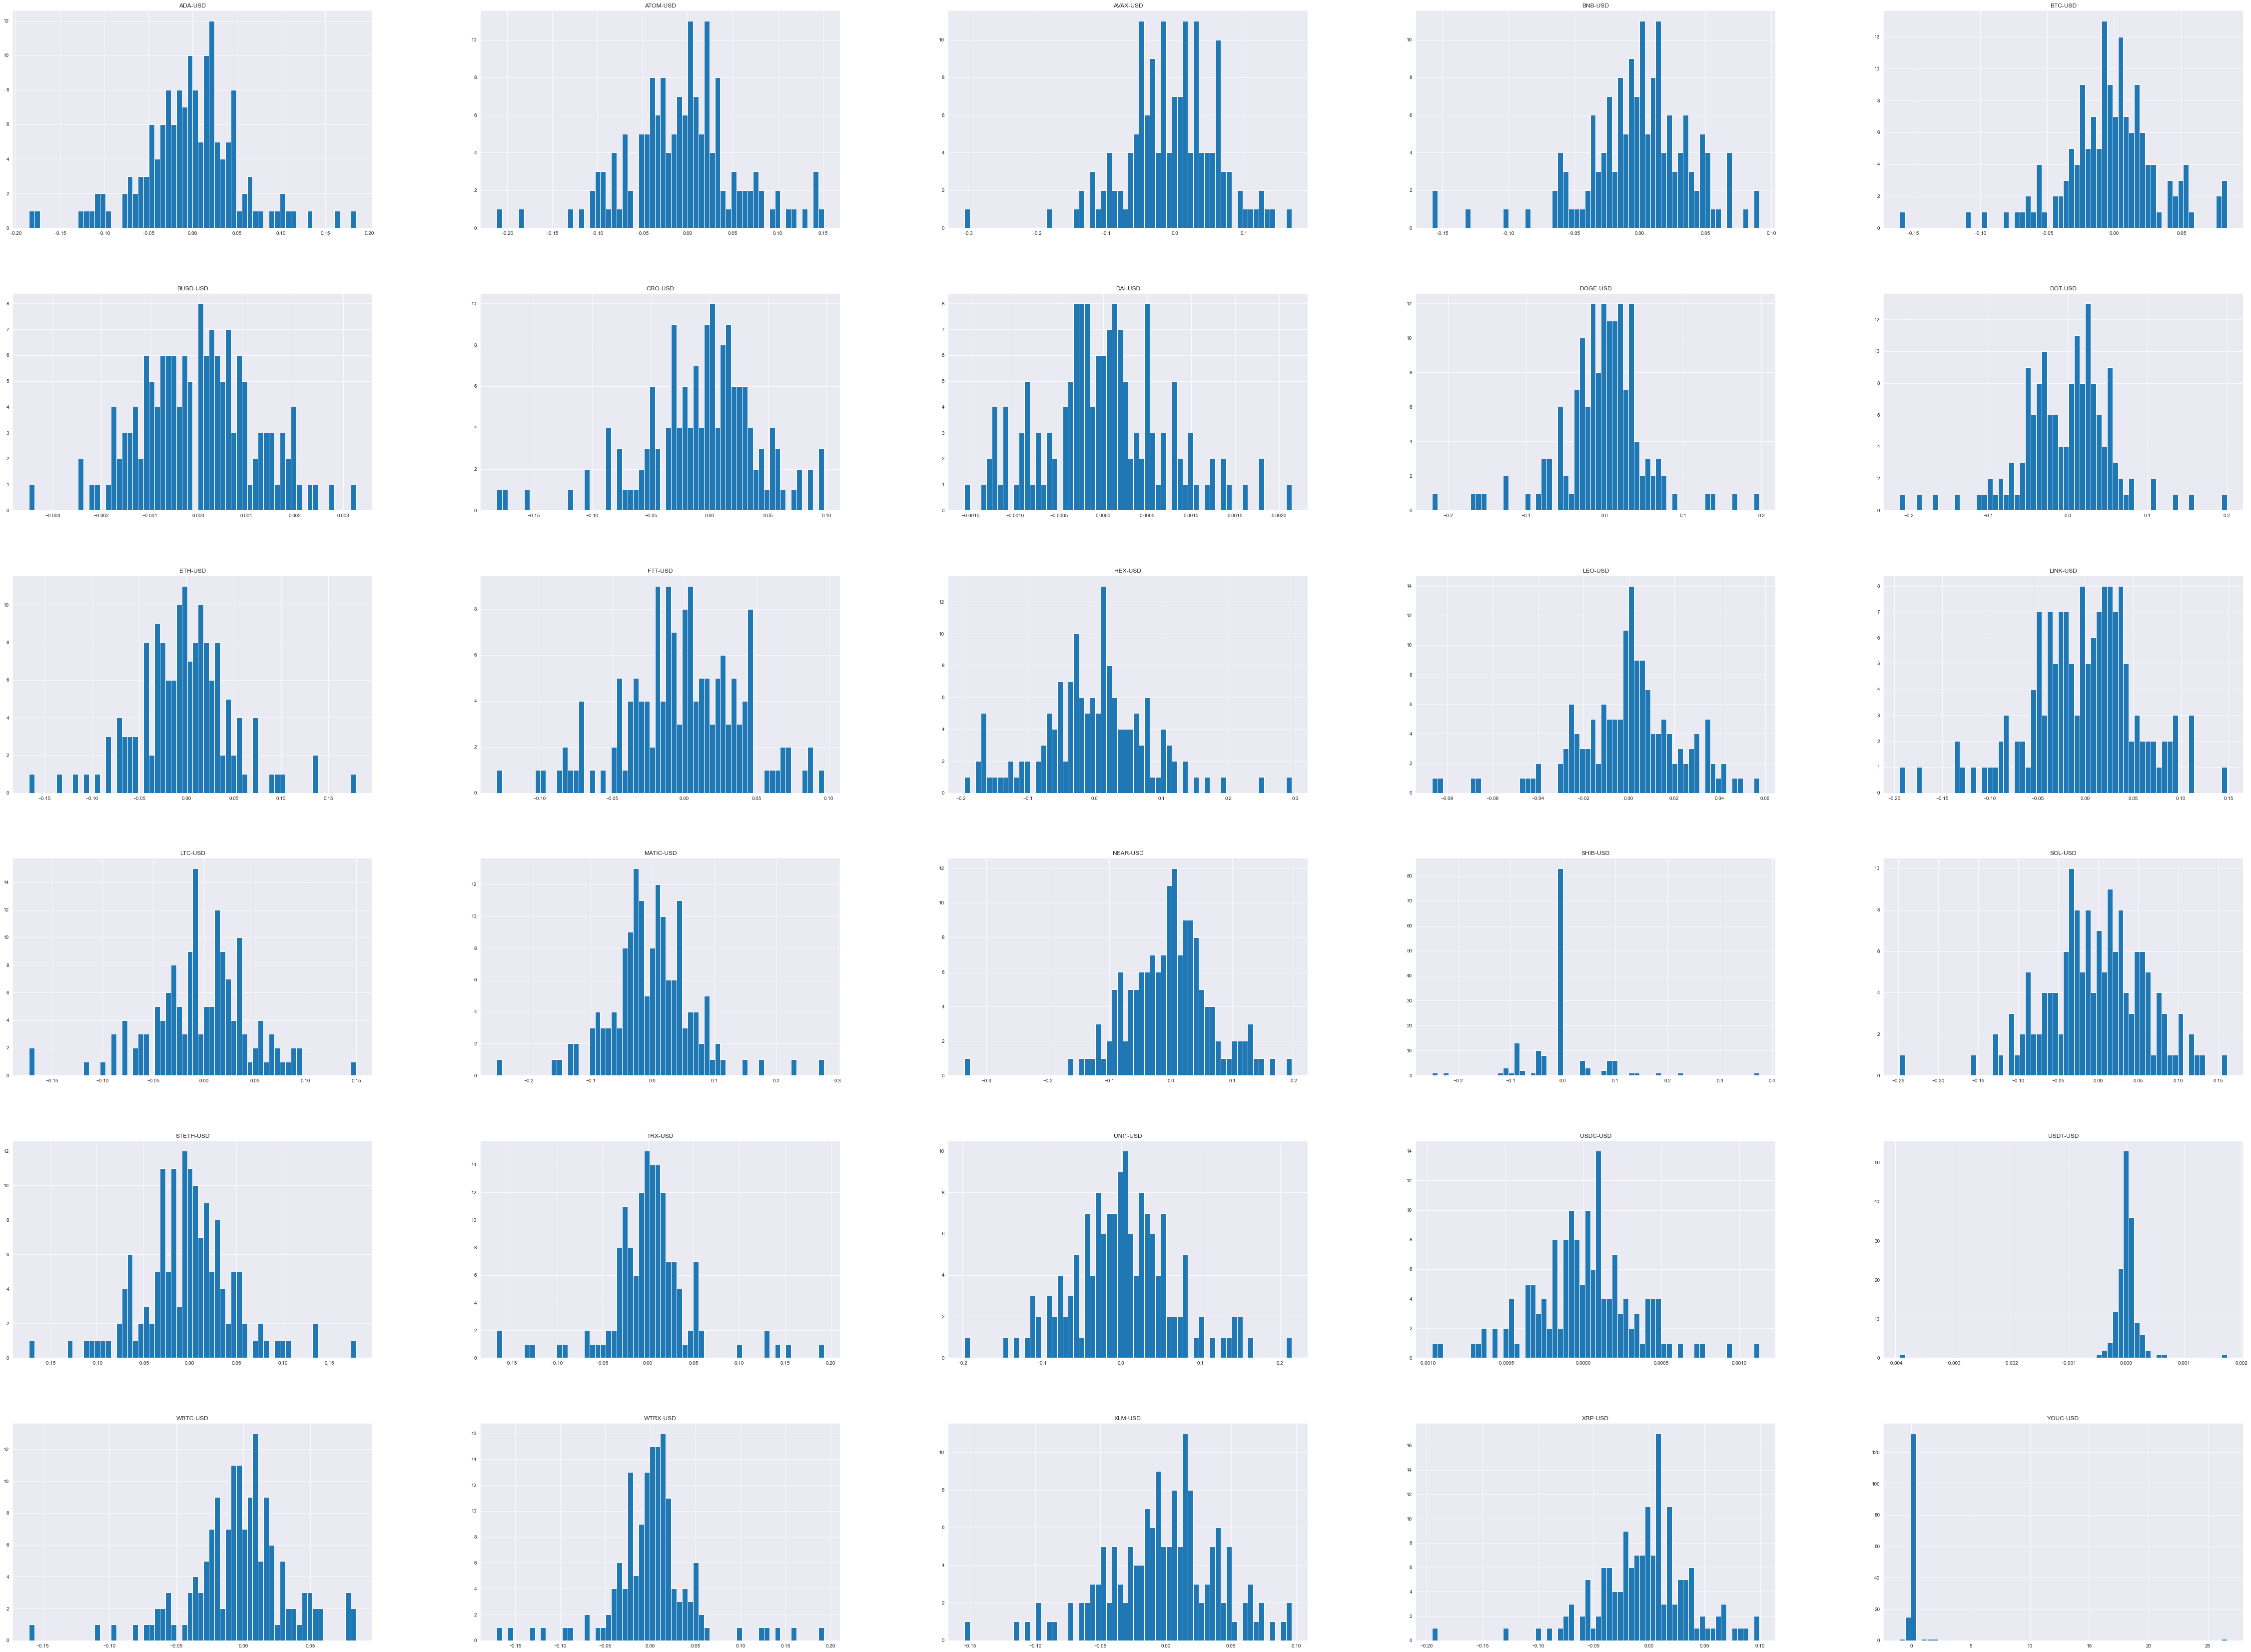

In [13]:
from matplotlib import pyplot

daily_returns.hist(bins=60, figsize =(80, 60))
#plt.figure(figsize=(20,10))
pyplot.show()

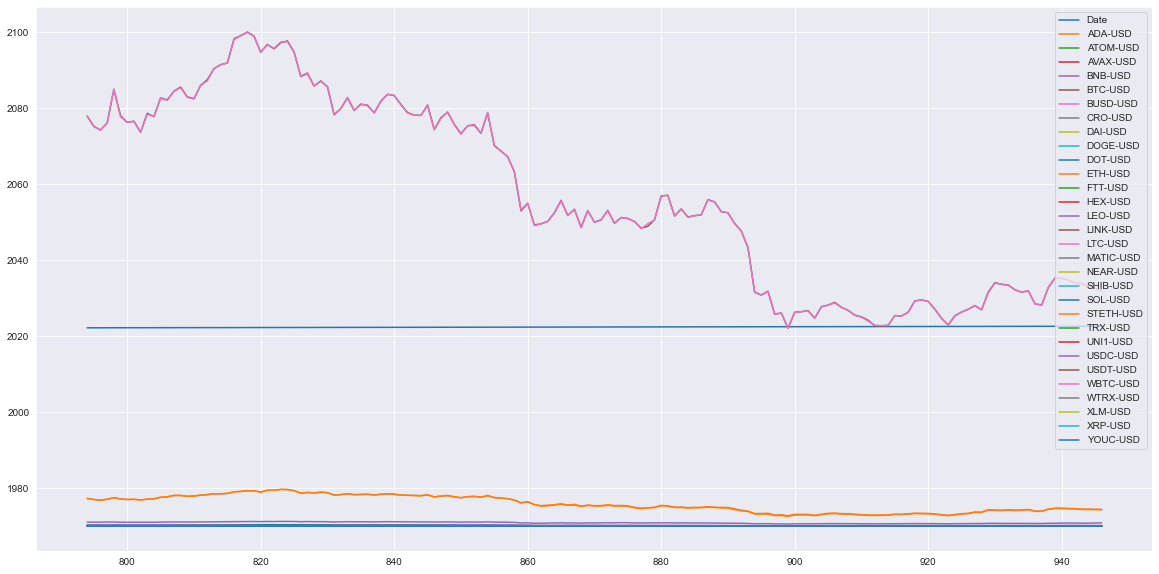

In [14]:
New_data.plot(figsize = (20,10))
plt.legend()
plt.show()

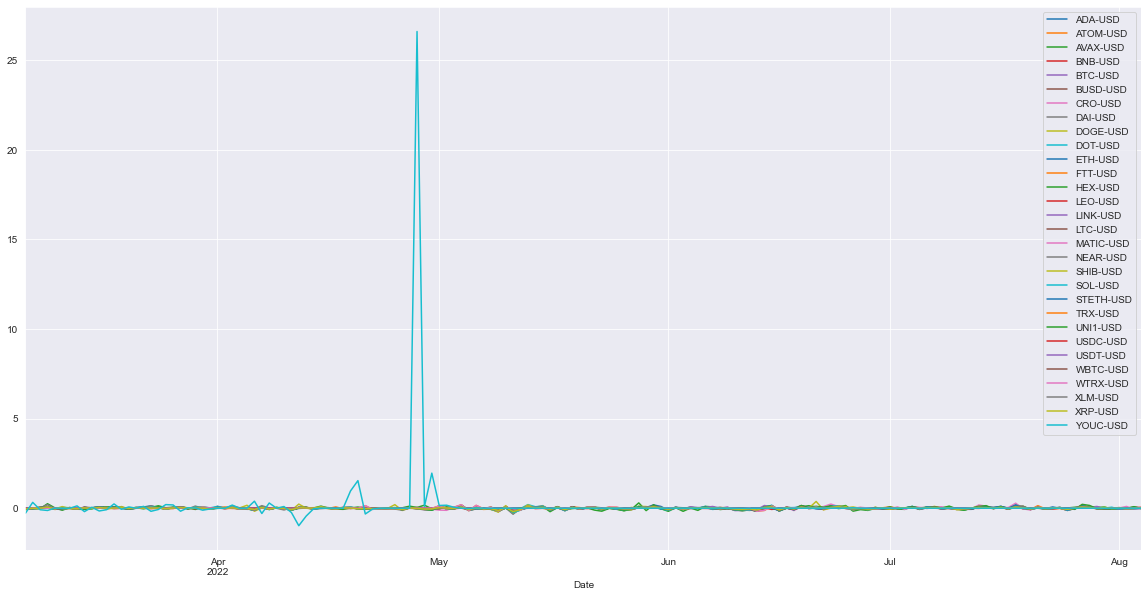

In [15]:
daily_returns.plot(figsize = (20,10))
plt.legend()
plt.show()

From the returns we can see that the dodge coin is doing better.

Box plot analysis to show the outliers

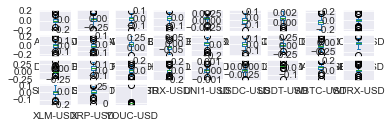

In [16]:
daily_returns.plot(kind='box', subplots=True, layout = (9,9), sharex = False)
pyplot.show()

In [17]:
daily_returns.skew()

ADA-USD      -0.037965
ATOM-USD     -0.039123
AVAX-USD     -0.565591
BNB-USD      -0.882706
BTC-USD      -0.548565
BUSD-USD      0.065203
CRO-USD      -0.742923
DAI-USD       0.295418
DOGE-USD     -0.376087
DOT-USD      -0.282750
ETH-USD       0.132397
FTT-USD      -0.269792
HEX-USD       0.213548
LEO-USD      -0.687277
LINK-USD     -0.401435
LTC-USD      -0.390425
MATIC-USD     0.328329
NEAR-USD     -0.421798
SHIB-USD      0.992377
SOL-USD      -0.323841
STETH-USD     0.132448
TRX-USD       0.172398
UNI1-USD      0.207639
USDC-USD      0.070068
USDT-USD     -6.623353
WBTC-USD     -0.575581
WTRX-USD      0.189112
XLM-USD      -0.407622
XRP-USD      -0.659726
YOUC-USD     12.091332
dtype: float64

Correlation

In [18]:
Correlations = daily_returns.corr(method='spearman')
Correlations

,ADA-USD,ATOM-USD,AVAX-USD,BNB-USD,BTC-USD,BUSD-USD,CRO-USD,DAI-USD,DOGE-USD,DOT-USD,...,STETH-USD,TRX-USD,UNI1-USD,USDC-USD,USDT-USD,WBTC-USD,WTRX-USD,XLM-USD,XRP-USD,YOUC-USD
ADA-USD,1.000000,0.757977,0.843660,0.813507,0.832455,0.051381,0.801946,0.317406,0.773003,0.849251,...,0.823960,0.599618,0.773891,0.159976,0.427597,0.829076,0.563938,0.870198,0.851506,0.065480
ATOM-USD,0.757977,1.000000,0.813585,0.810896,0.778125,-0.019669,0.769746,0.221376,0.688045,0.783271,...,0.784242,0.583670,0.791408,0.082911,0.433915,0.778747,0.569378,0.783326,0.782496,0.053283
AVAX-USD,0.843660,0.813585,1.000000,0.848581,0.837212,0.038724,0.800802,0.318790,0.741353,0.834198,...,0.877378,0.556083,0.789897,0.075363,0.453636,0.837161,0.522894,0.823044,0.830726,0.070309
BNB-USD,0.813507,0.810896,0.848581,1.000000,0.837116,-0.000058,0.791944,0.313626,0.738640,0.852753,...,0.849165,0.639295,0.780586,0.083120,0.391528,0.839577,0.609865,0.837451,0.833928,0.067192
BTC-USD,0.832455,0.778125,0.837212,0.837116,1.000000,0.015668,0.836330,0.276341,0.764757,0.820679,...,0.893486,0.597670,0.765307,0.124659,0.434089,0.997116,0.584994,0.832752,0.812875,0.107437
BUSD-USD,0.051381,-0.019669,0.038724,-0.000058,0.015668,1.000000,-0.036738,0.083479,-0.032371,-0.022909,...,-0.011656,0.004377,0.005286,0.051846,-0.028431,0.024047,-0.007415,0.030174,0.016092,-0.110294
CRO-USD,0.801946,0.769746,0.800802,0.791944,0.836330,-0.036738,1.000000,0.261825,0.734392,0.809792,...,0.835896,0.577635,0.726840,0.146509,0.470701,0.828491,0.553365,0.811658,0.768369,0.008376
DAI-USD,0.317406,0.221376,0.318790,0.313626,0.276341,0.083479,0.261825,1.000000,0.223023,0.272678,...,0.262068,0.280538,0.167846,0.400324,0.072769,0.268772,0.276640,0.232007,0.213011,-0.084143
DOGE-USD,0.773003,0.688045,0.741353,0.738640,0.764757,-0.032371,0.734392,0.223023,1.000000,0.745881,...,0.748543,0.532877,0.711921,0.126836,0.361819,0.760793,0.490393,0.725084,0.764344,0.070538
DOT-USD,0.849251,0.783271,0.834198,0.852753,0.820679,-0.022909,0.809792,0.272678,0.745881,1.000000,...,0.839997,0.600462,0.775385,0.120244,0.441542,0.822795,0.568387,0.861576,0.838186,0.054698


In [19]:
#sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(daily_returns.corr)
plt.show

AttributeError: module 'sns' has no attribute 'heatmap'

Now we have gotten how BTC is correlated with 10 coins

In [20]:
corr_df = Correlations
corr_df['BTC-USD'].nlargest(10)

BTC-USD      1.000000
WBTC-USD     0.997116
ETH-USD      0.903833
STETH-USD    0.893486
AVAX-USD     0.837212
BNB-USD      0.837116
CRO-USD      0.836330
LTC-USD      0.834290
XLM-USD      0.832752
ADA-USD      0.832455
Name: BTC-USD, dtype: float64

In [21]:
corr_df = Correlations
corr_df['BTC-USD'].nsmallest(10)

BUSD-USD    0.015668
YOUC-USD    0.107437
USDC-USD    0.124659
DAI-USD     0.276341
LEO-USD     0.290325
USDT-USD    0.434089
HEX-USD     0.543863
WTRX-USD    0.584994
TRX-USD     0.597670
SHIB-USD    0.666795
Name: BTC-USD, dtype: float64

In [ ]:

#plt.scatter(corr_df)
plt.scatter(daily_returns['BTC-USD'], daily_returns['NEAR-USD'])
plt.show()